In [ ]:
import pandas as pd
from pandas import Series
from pandas import DataFrame

import numpy as np
from sklearn import datasets as ds # allows us access to datasets

iris = ds.load_iris() # NumPy matrix returned

print iris['DESCR']
# ds.data gives numpy 4 dimensional quantitative data set, each row is a flower, columns are feature values
# ds.target is the label we are trying to predict (class)

In [ ]:
# iris.data gives numeric columns
# iris.target gives class column
df = DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target.astype(np.int)
print df.info()
df.head()
# 0 setosa. 1 versicolor, 2 virginica

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()
sns.pairplot(df, hue="target", size =2) # hue represents different classes each object originates in
# can tell blue is definitely classifiable away from red and green which are compacted more with one another

In [ ]:
from sklearn.decomposition import PCA
from sklearn.lda import LDA

X = iris.data # these are the features

y = iris.target # these are the labels

# how do we know we only want 2 components? check variance explained
pca = PCA(n_components=2) # set up object, class structure in scikit-learn
X_pca = pca.fit(X).transform(X)
# take the object, fit it given the training data X (just numerical features), 
# eigenvalues and eigenvectors and return them
# the .transform saves the two new dimensions to X_pca, does the actual dot product process for us
# we can use .transform now to transform new data any time once a PCA object is fit n scikitlearn 

lda = LDA(n_components=2) # can never get more than # of classes available
X_lda = lda.fit(X, y).transform(X) # needs labels since we care about classes here

# lets look at the eigenvectors we wanted
print 'pca: \n', pca.components_# call class object, underscore used for properties that arent set until object fit
print 'pca: \n', pca.components_.T
print 'variance explained: ', pca.explained_variance_ratio_
print X[0]
print X_pca[0], '\n'
# we can use components_ after we fit the data
print 'lda: ', lda.scalings_.T


In [ ]:
# this function marks up the visualization for us
def get_feature_names_from_weights(weights,names):
    tmp_array = []
    for comp in weights:
        tmp_string = ''
        for fidx, f in enumerate(names):
            if fidx>0 and comp[fidx] >=0:
                tmp_string+= '+'
            tmp_string += '%.2f*%s ' % (comp[fidx],f[:-5])
        tmp_array.append(tmp_string)
    return tmp_array

pca_weight_strings = get_feature_names_from_weights(pca.components_, iris.feature_names)
lda_weight_strings = get_feature_names_from_weights(lda.scalings_.T, iris.feature_names)

df_pca = DataFrame(X_pca, columns = [pca_weight_strings])
df_lda = DataFrame(X_lda, columns = [lda_weight_strings])

df_pca

from pandas.tools.plotting import scatter_plot

# c provides colors, s provides for size
ax = scatter_plot(df_pca, pca_weight_strings[0], pca_weight_strings[1], c = y, s=(y+2)*10)
newfig = plt.figure()
ax = scatter_plot(df_lda, lda_weight_strings[0], lda_weight_strings[1], c = y, s=(y+2)*10)
plt.show()
# we can read the "types" produced by the PCA by the values associated with each eigenvector
# in this case eig1 is 0.36, -0.08, 0.86, 0.36 for sepal length, sepal width, petal length, petal width respectively
# this indicates that petal length and sepal length drive the variance in the first attribute


# A More Complicated Dataset, Faces

In [ ]:
# each eigenvector will be IMAGES of faces (fucking AWESOME)
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4) 
# minimum number of faces to use will be 70
# resize to be 40%

In [ ]:
X = lfw_people.data # these are images, actual pixel by pixel attribute representation for each image
# e.g.          px1  px2  px3  px4  px5 ... pxN
#          Bush
#      Rumsfeld

y = lfw_people.target 
names = lfw_people.target_names # these are names of people

n_samples, n_features = X.shape # put dimensions (rows = samples, cols = features) into variables
rows, h, w = lfw_people.images.shape
n_classes = len(names)
                
print 'n_samples: {}'.format(n_samples)
print 'n_features: {}'.format(n_features)
print 'n_classes: {}'.format(n_classes)
print 'Original Image Sizes: {} by {}'.format(h,w)
print 50*37 
print rows, h, w
# the size of the images are the size of the feature vectors
# every pixel has a grayscale value b/w 0 and 255, make long vector out of 2D image (1850 pixels per vector,
# each individual pixel is represented)

50 37


(1288, 1850)

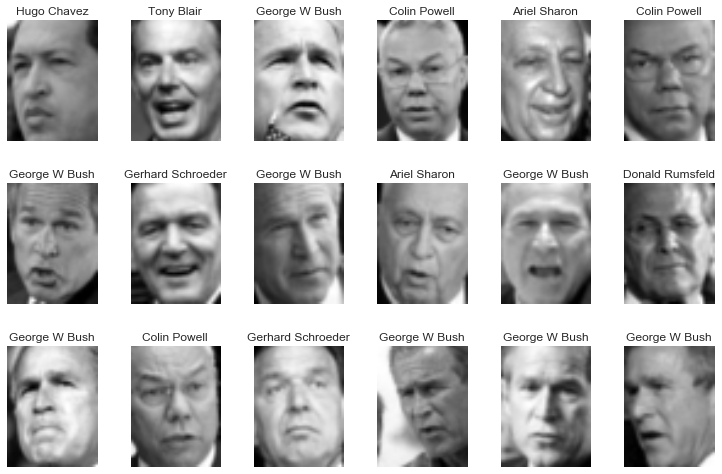

In [8]:
# helper function to plot 18 images
def plot_gallery(images, titles, h, w, n_row = 3, n_col = 6):
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom = 0, left = .01, right = .99, top = .90, hspace = .35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h,w)), cmap= plt.cm.gray) # imshow plots the images based on pixel RBGs or gray
        plt.title(titles[i], size = 12)
        plt.xticks(())
        plt.yticks(())
        
plot_gallery(X, names[y], h, w)
# each image is an 1800+ feature dimensional vector
print h, w
X.shape

In [9]:
# now lets run PCA and use the first 300 principal components to reconstruct the faces

from sklearn.decomposition import PCA
n_components = 200
print 'Extracting the top %d eigenfaces from %d faces' %(n_components, X.shape[0])

pca = PCA(n_components = n_components) # run PCA, keeping the first 200 eigenvectors
%time pca.fit(X) # time the operation using %time magics, we are fitting the projection matrix here
print pca.components_.shape
# reason we have an issue here is we have not transformed X yet, we've only fit the matrix
# we can now transform the pictures directly, pull out the individual eigenvectors
# reshape the eigenvectors to fit picture dimensions h,w
# eigenfaces is a three dimensional matrix: there are 300 vectors each with a shape of 50,37
eigenfaces = pca.components_.reshape((n_components, h, w)) 
# we can form the eigenfaces directly from the projection matrix fit (eigenvectors)

Extracting the top 200 eigenfaces from 1288 faces
CPU times: user 1.48 s, sys: 30.3 ms, total: 1.51 s
Wall time: 409 ms
(200, 1850)


In [ ]:
eigenfaces[1]

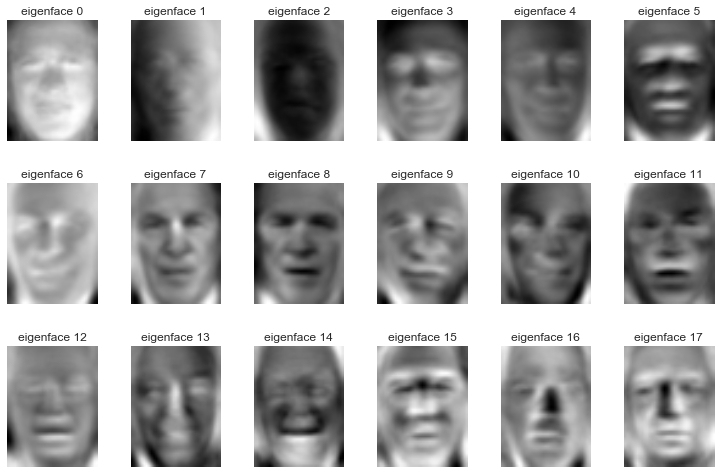

In [10]:
# plot the first 18 eigenfaces
# eigenface 0 is the most relevant eigenface
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(pca.components_, eigenface_titles, h, w)

In [12]:
# here we will actually transform the original data set by calling pca.transform on a single picture row vector
# 1x1850 * 1850x200, which will result in a 1x200 row vector of transformed data points now projected onto 200
# dimensions
def reconstruct_image(trans_obj, org_features, faces):
    low_rep = trans_obj.transform(org_features)[0] # transform a single picture using PCA results above
                                 
    rec_image = np.zeros(faces[0].shape)   # create a placeholder matrix in the size of the picture
    for idx, weight in enumerate(low_rep): # loop through transformed vector, grabbing each transformed value / weight
                                           # and use it to multiply against the eigenface matrices to build up face
                                           # height and width
        rec_image += weight * faces[idx]   # multiply each of N eigenfaces by weights from transformed picture
    return low_rep, rec_image              # where each weight is the transformed value for the picture

idx_to_reconstruct = 3
low_dimensional_representation, reconstructed_image = reconstruct_image(pca, X[idx_to_reconstruct], eigenfaces)

In [ ]:
low_dimensional_representation.shape

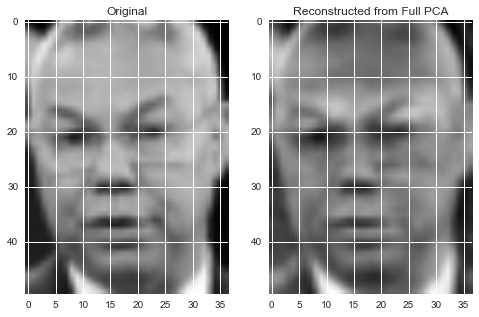

In [13]:
plt.subplot(1,2,1)
plt.imshow(X[idx_to_reconstruct].reshape((h,w)), cmap = plt.cm.gray)
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(reconstructed_image, cmap=plt.cm.gray)
plt.title('Reconstructed from Full PCA')

# USING RANDOMIZED PCA

In [18]:
from sklearn.decomposition import RandomizedPCA

n_components = 50
print "Extracting the top %d eigenfaces from %d faces" % (
    n_components, X.shape[0])

pca = RandomizedPCA(n_components=n_components)
%time pca.fit(X)
eigenfaces = pca.components_.reshape((n_components, h, w))

Extracting the top 50 eigenfaces from 1288 faces
CPU times: user 258 ms, sys: 36.1 ms, total: 294 ms
Wall time: 88 ms


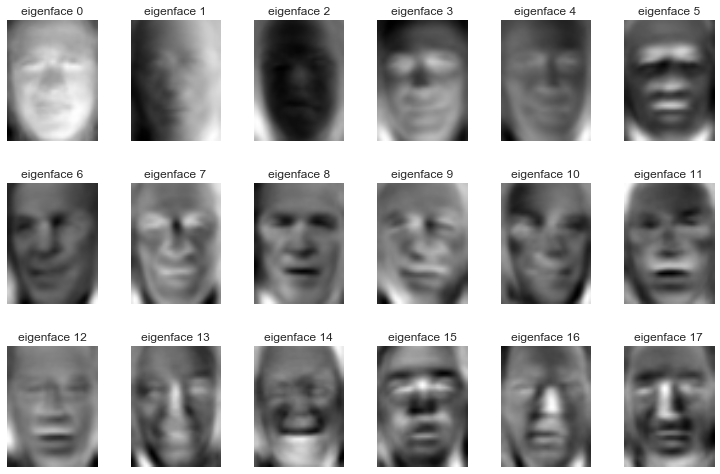

In [19]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

<function __main__.plt_reconstruct>

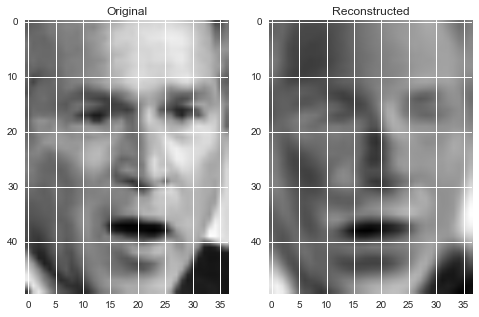

In [20]:
from random import randint as rd
from ipywidgets import widgets  # make this interactive!

def plt_reconstruct(idx_to_reconstruct):
    idx_to_reconstruct = np.round(idx_to_reconstruct)
    low_dimensional_representation, reconstructed_image = reconstruct_image(pca,X[idx_to_reconstruct],eigenfaces)

    plt.subplot(1,2,1)
    plt.imshow(X[idx_to_reconstruct].reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Original')
    plt.subplot(1,2,2)
    plt.imshow(reconstructed_image, cmap=plt.cm.gray)
    plt.title('Reconstructed')
    
widgets.interact(plt_reconstruct, idx_to_reconstruct= rd(1,100))

## 